# https://www.kaggle.com/datasets/nafin59/monkeypox-skin-lesion-dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers,Model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

In [2]:
train_dir = r'archive/Fold1/Fold1/Fold1/Train//'
test_dir = r'archive/Fold1/Fold1/Fold1/Test//'
val_dir = r'archive/Fold1/Fold1/Fold1/Val/'

In [3]:
img_size = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=img_size,
                                                                 label_mode='binary',
                                                                 batch_size=32,shuffle=True)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=img_size,
                                                                label_mode='binary',
                                                                batch_size=32,
                                                                shuffle=True)
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                               image_size=img_size,
                                                               label_mode='binary',
                                                               batch_size=32,
                                                               shuffle=True)


Found 2142 files belonging to 2 classes.
Found 45 files belonging to 2 classes.
Found 420 files belonging to 2 classes.


In [4]:
def visualize_random_images(dataset_type='train',label_type='Others'):
    sample = 9
    plt.figure(figsize=(15,8))
    type_dir = train_dir if dataset_type == 'train' else test_dir
    base_dir = os.path.join(type_dir,label_type)
    images = random.sample(os.listdir(base_dir),9)
    for i,image in enumerate(images):
        plt.subplot(3,3,i+1)
        img = plt.imread(os.path.join(base_dir,image))
        plt.imshow(img)
    plt.show()
        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

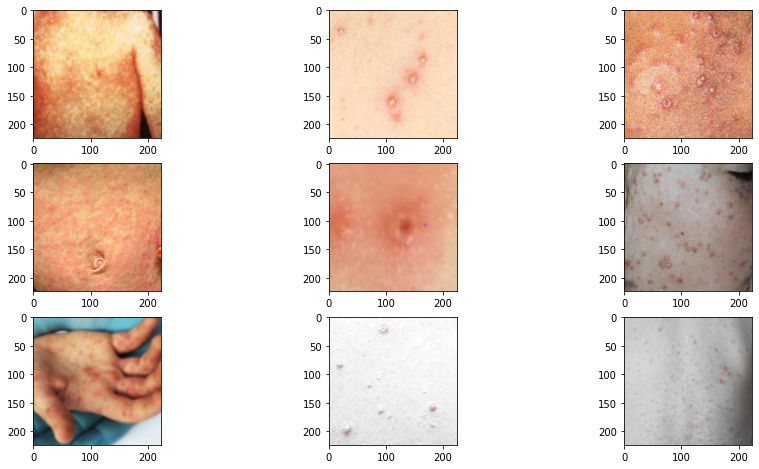

In [5]:
visualize_random_images()

In [6]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']                   
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(loss))
    plt.plot(epochs,loss,label='train_loss')
    plt.plot(epochs,val_data,label='val_loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.plot(epochs,loss,label='train_accuracy')
    plt.plot(epochs,val_data,label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.legend()
                   

# model

In [7]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False,weights='imagenet')
base_model.trainable = True
for layer in base_model.layers[:-5]:
    layer.trainable = False
inputs = layers.Input(
    shape=(224,224,3),name='input_layer')
base_layer=base_model(inputs)
dropout_layer_1 = layers.Dropout(0.5)(base_layer)
flat_layer = layers.Flatten()(dropout_layer_1)
dense_1 = layers.Dense(256,activation='relu')(flat_layer)
dropout_layer_2 = layers.Dropout(0.5)(dense_1)
dense_2 = layers.Dense(128,activation='relu')(dropout_layer_2)
outputs = layers.Dense(1,activation='softmax')(dense_2)
model= Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb3 (Functional)  (None, None, None, 1536)  10783535  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 1536)        0         
_________________________________________________________________
flatten (Flatten)            (None, 75264)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               19267840  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896 

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
# 配置保存检查点的回调函数
cp_callback = tf.keras.callbacks.ModelCheckpoint('training_cp/cp.ckpt',save_weights_only=True)
history = model.fit(train_data,epochs=20,validation_data=val_data,callbacks=[cp_callback])

Epoch 1/20


f:\python\py3.6\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


67/67 [==============================] - 190s 3s/step - loss: 1.0389 - accuracy: 0.5425 - val_loss: 1.2059 - val_accuracy: 0.6000
Epoch 2/20
67/67 [==============================] - 177s 3s/step - loss: 0.3724 - accuracy: 0.5425 - val_loss: 1.0951 - val_accuracy: 0.6000
Epoch 3/20
67/67 [==============================] - 176s 3s/step - loss: 0.2492 - accuracy: 0.5425 - val_loss: 1.0425 - val_accuracy: 0.6000
Epoch 4/20
67/67 [==============================] - 175s 3s/step - loss: 0.1701 - accuracy: 0.5425 - val_loss: 1.8144 - val_accuracy: 0.6000
Epoch 5/20
67/67 [==============================] - 160s 2s/step - loss: 0.1536 - accuracy: 0.5425 - val_loss: 0.9582 - val_accuracy: 0.6000
Epoch 6/20
67/67 [==============================] - 157s 2s/step - loss: 0.1521 - accuracy: 0.5425 - val_loss: 1.2730 - val_accuracy: 0.6000
Epoch 7/20
67/67 [==============================] - 152s 2s/step - loss: 0.1447 - accuracy: 0.5425 - val_loss: 0.7640 - val_accuracy: 0.6000
Epoch 8/20
67/67 [======

In [9]:
plt_loss_curves(history)

NameError: name 'plt_loss_curves' is not defined

In [ ]:
model.evaluate(test_data)


In [ ]:
y_pred = tf.math.round(model.predict(test_data))
y_true = []
for images,label in test_data,unbatch():
    y_train.append(label.numpy())

In [ ]:
accuracy_score(y_true,y_pred)